In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
combined_data = pd.read_csv('cleaned_data.csv')

In [3]:
combined_data.head()

,T,TM,Tm,H,PP,VV,V,VM,PM_2_5
0,23.4,30.3,19.0,59.0,0.0,6.3,4.3,5.4,284.795833
1,22.4,30.3,16.9,57.0,0.0,6.9,3.3,7.6,239.695455
2,24.0,31.8,16.9,51.0,0.0,6.9,2.8,5.4,182.187500
3,22.8,30.2,17.6,55.0,0.0,7.7,3.7,7.6,264.064286
4,23.1,30.6,17.4,46.0,0.0,6.9,3.3,5.4,223.208333


In [4]:
X = combined_data.iloc[:, :-1]
y = combined_data.iloc[:, -1]

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
f'Coefficient of determination R^2 on train set {lin_reg.score(X_train, y_train)}'
# must be close to 1, 1 is perfect fit

'Coefficient of determination R^2 on train set 0.40130070313506305'

In [8]:
f'Coefficient of determination R^2 on test set {lin_reg.score(X_test, y_test)}'

'Coefficient of determination R^2 on test set 0.3202915645310601'

In [9]:
lin_reg.coef_

array([-15.84230876,  -0.72209799,  -2.51152075,  -1.38818232,
        -0.84155463,  -9.35371295, -11.32087403,   0.5496871 ])

In [10]:
lin_reg.intercept_

763.0768032875105

In [11]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X, y, cv = 3)

In [12]:
score.mean()

0.2838598029575892

In [13]:
pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coeff'])

,Coeff
T,-15.842309
TM,-0.722098
Tm,-2.511521
H,-1.388182
PP,-0.841555
VV,-9.353713
V,-11.320874
VM,0.549687


In [14]:
c = 0
for val in lin_reg.coef_:
    effect = 'increase' if val>0 else 'decrease'
    print(f'Holding all other features fixed a 1 unit increase in {X.columns[c]} is associated with {effect} of val in AQI PM2.5')
    c = c+1

Holding all other features fixed a 1 unit increase in T is associated with decrease of val in AQI PM2.5
Holding all other features fixed a 1 unit increase in TM is associated with decrease of val in AQI PM2.5
Holding all other features fixed a 1 unit increase in Tm is associated with decrease of val in AQI PM2.5
Holding all other features fixed a 1 unit increase in H is associated with decrease of val in AQI PM2.5
Holding all other features fixed a 1 unit increase in PP is associated with decrease of val in AQI PM2.5
Holding all other features fixed a 1 unit increase in VV is associated with decrease of val in AQI PM2.5
Holding all other features fixed a 1 unit increase in V is associated with decrease of val in AQI PM2.5
Holding all other features fixed a 1 unit increase in VM is associated with increase of val in AQI PM2.5


In [15]:
pred = lin_reg.predict(X_test)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


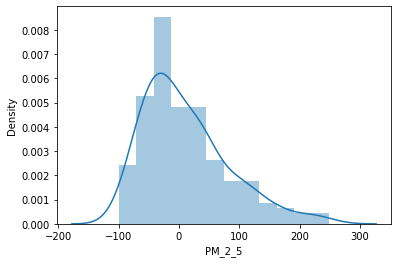

In [16]:
sns.distplot(y_test - pred)

In [17]:
from sklearn import metrics
print(f"Mean Abs Error: {metrics.mean_absolute_error(y_test, pred)}")
print(f"Mean Sq Error: {metrics.mean_squared_error(y_test, pred)}")
print(f"Root Mean Error: {np.sqrt(metrics.mean_squared_error(y_test, pred))}")

Mean Abs Error: 55.12183806894885
Mean Sq Error: 5157.172338744652
Root Mean Error: 71.81345513721402


In [18]:
import pickle
pickle.dump(lin_reg, open('linreg.pkl', 'wb'))